###เรียกใช้ข้อมูล

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import plotly.graph_objects as go
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_excel("/content/oil_price.xlsx")
df

,วัน/เดือน/ปี,เชลล์ ฟิวเซฟ ดีเซล B7,เชลล์ วี-เพาเวอร์ ดีเซล,เชลล์ ฟิวเซฟ แก๊สโซฮอล์ 91,เชลล์ วี-เพาเวอร์ แก๊สโซฮอล์ 95,เชลล์ ฟิวเซฟ แก๊สโซฮอล์ E20
0,04-01-2020,26.89,NaN,25.98,31.74,23.24
1,06-01-2020,27.39,NaN,26.18,31.94,23.44
2,10-01-2020,27.39,NaN,25.88,31.64,23.14
3,11-01-2020,27.89,NaN,26.48,32.24,23.74
4,16-01-2020,27.49,NaN,26.48,32.24,23.74
...,...,...,...,...,...,...
241,08-12-2018,27.09,30.96,27.18,31.74,24.44
242,13-12-2018,26.79,30.66,27.18,31.74,24.44
243,20-12-2018,26.29,30.16,26.88,31.63,24.14
244,25-12-2018,25.29,29.35,25.88,30.63,23.14


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   วัน/เดือน/ปี                     246 non-null    object 
 1   เชลล์ ฟิวเซฟ ดีเซล B7            246 non-null    float64
 2   เชลล์ วี-เพาเวอร์ ดีเซล          173 non-null    float64
 3   เชลล์ ฟิวเซฟ แก๊สโซฮอล์ 91       246 non-null    float64
 4   เชลล์ วี-เพาเวอร์ แก๊สโซฮอล์ 95  246 non-null    object 
 5   เชลล์ ฟิวเซฟ แก๊สโซฮอล์ E20      246 non-null    float64
dtypes: float64(4), object(2)
memory usage: 11.7+ KB


In [ ]:
df.rename(columns={"วัน/เดือน/ปี":"Date","เชลล์ ฟิวเซฟ ดีเซล B7":"B7","เชลล์ วี-เพาเวอร์ ดีเซล":"Diesel","เชลล์ ฟิวเซฟ แก๊สโซฮอล์ 91":"91","เชลล์ วี-เพาเวอร์ แก๊สโซฮอล์ 95":"95","เชลล์ ฟิวเซฟ แก๊สโซฮอล์ E20":"E20"},inplace=True)
df

,Date,B7,Diesel,91,95,E20
0,04-01-2020,26.89,NaN,25.98,31.74,23.24
1,06-01-2020,27.39,NaN,26.18,31.94,23.44
2,10-01-2020,27.39,NaN,25.88,31.64,23.14
3,11-01-2020,27.89,NaN,26.48,32.24,23.74
4,16-01-2020,27.49,NaN,26.48,32.24,23.74
...,...,...,...,...,...,...
241,08-12-2018,27.09,30.96,27.18,31.74,24.44
242,13-12-2018,26.79,30.66,27.18,31.74,24.44
243,20-12-2018,26.29,30.16,26.88,31.63,24.14
244,25-12-2018,25.29,29.35,25.88,30.63,23.14


In [ ]:
df["Date"]= pd.to_datetime(df["Date"])

In [ ]:
df['95'] = df['95'].astype(float, errors = 'raise')

In [ ]:
df['Diesel'] = df['Diesel'].astype(float, errors = 'raise')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    246 non-null    datetime64[ns]
 1   B7      246 non-null    float64       
 2   Diesel  173 non-null    float64       
 3   91      246 non-null    float64       
 4   95      246 non-null    float64       
 5   E20     246 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 11.7 KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%m %d, %Y")
df

,Date,B7,Diesel,91,95,E20
0,2020-04-01,26.89,NaN,25.98,31.74,23.24
1,2020-06-01,27.39,NaN,26.18,31.94,23.44
2,2020-10-01,27.39,NaN,25.88,31.64,23.14
3,2020-11-01,27.89,NaN,26.48,32.24,23.74
4,2020-01-16,27.49,NaN,26.48,32.24,23.74
...,...,...,...,...,...,...
241,2018-08-12,27.09,30.96,27.18,31.74,24.44
242,2018-12-13,26.79,30.66,27.18,31.74,24.44
243,2018-12-20,26.29,30.16,26.88,31.63,24.14
244,2018-12-25,25.29,29.35,25.88,30.63,23.14


In [ ]:
df.isnull().any()

Date      False
B7        False
Diesel     True
91        False
95        False
E20       False
dtype: bool

In [ ]:
df["Diesel"].fillna(0, inplace=True)
df

,Date,B7,Diesel,91,95,E20
0,2020-04-01,26.89,0.00,25.98,31.74,23.24
1,2020-06-01,27.39,0.00,26.18,31.94,23.44
2,2020-10-01,27.39,0.00,25.88,31.64,23.14
3,2020-11-01,27.89,0.00,26.48,32.24,23.74
4,2020-01-16,27.49,0.00,26.48,32.24,23.74
...,...,...,...,...,...,...
241,2018-08-12,27.09,30.96,27.18,31.74,24.44
242,2018-12-13,26.79,30.66,27.18,31.74,24.44
243,2018-12-20,26.29,30.16,26.88,31.63,24.14
244,2018-12-25,25.29,29.35,25.88,30.63,23.14


In [ ]:
df

,Date,B7,Diesel,91,95,E20
0,2020-04-01,26.89,0.00,25.98,31.74,23.24
1,2020-06-01,27.39,0.00,26.18,31.94,23.44
2,2020-10-01,27.39,0.00,25.88,31.64,23.14
3,2020-11-01,27.89,0.00,26.48,32.24,23.74
4,2020-01-16,27.49,0.00,26.48,32.24,23.74
...,...,...,...,...,...,...
241,2018-08-12,27.09,30.96,27.18,31.74,24.44
242,2018-12-13,26.79,30.66,27.18,31.74,24.44
243,2018-12-20,26.29,30.16,26.88,31.63,24.14
244,2018-12-25,25.29,29.35,25.88,30.63,23.14


###กราฟ

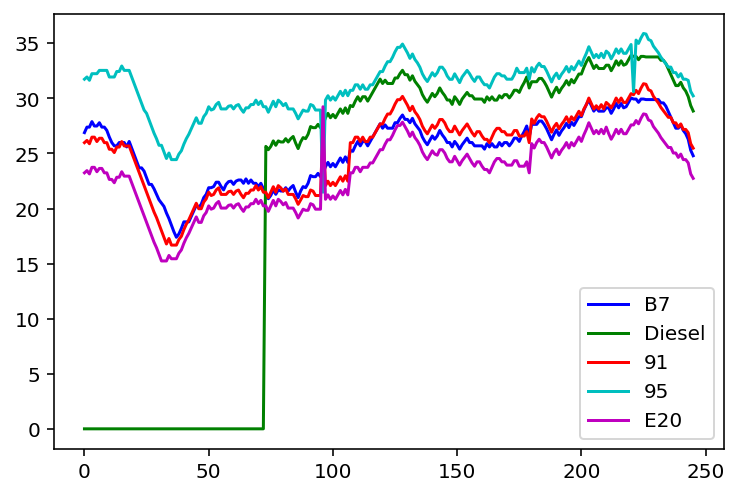

In [ ]:
df[['B7','Diesel' ,'91', '95','E20']].plot(kind='line', color=['b','g', 'r', 'c', 'm'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f221d2af450>,
      dtype=object)

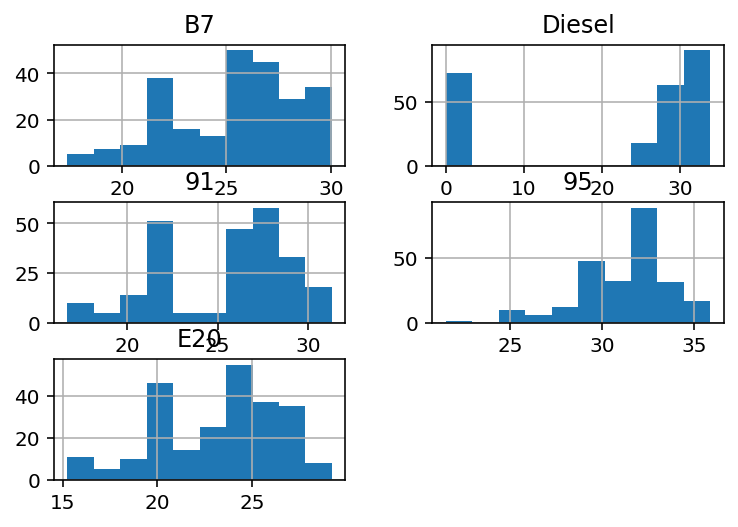

In [ ]:
df[['B7','Diesel' ,'91', '95','E20']].hist()

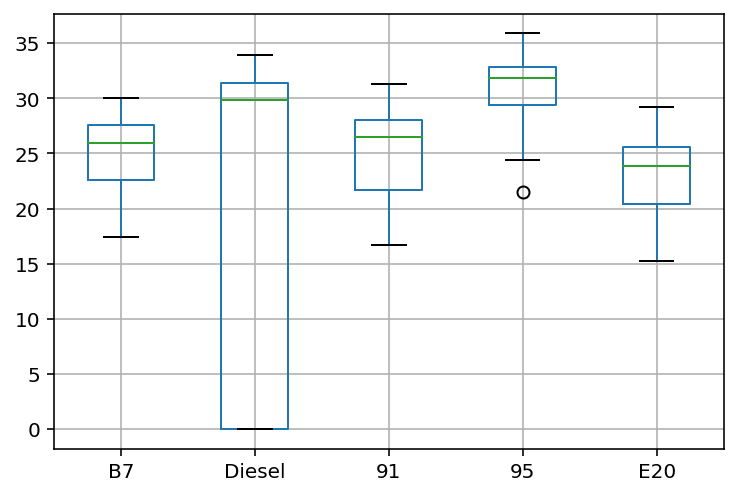

In [ ]:
df[['B7','Diesel' ,'91', '95','E20']].boxplot()

###การทดลอง

In [ ]:
df

,Date,B7,Diesel,91,95,E20
0,2020-04-01,26.89,0.00,25.98,31.74,23.24
1,2020-06-01,27.39,0.00,26.18,31.94,23.44
2,2020-10-01,27.39,0.00,25.88,31.64,23.14
3,2020-11-01,27.89,0.00,26.48,32.24,23.74
4,2020-01-16,27.49,0.00,26.48,32.24,23.74
...,...,...,...,...,...,...
241,2018-08-12,27.09,30.96,27.18,31.74,24.44
242,2018-12-13,26.79,30.66,27.18,31.74,24.44
243,2018-12-20,26.29,30.16,26.88,31.63,24.14
244,2018-12-25,25.29,29.35,25.88,30.63,23.14


In [ ]:
X = df[['B7',	'Diesel',	'91',	'95',	'E20']]
X.head()

,B7,Diesel,91,95,E20
0,26.89,0.0,25.98,31.74,23.24
1,27.39,0.0,26.18,31.94,23.44
2,27.39,0.0,25.88,31.64,23.14
3,27.89,0.0,26.48,32.24,23.74
4,27.49,0.0,26.48,32.24,23.74


In [ ]:
y = df[['B7',	'Diesel',	'91',	'95',	'E20']]
y.head()

,B7,Diesel,91,95,E20
0,26.89,0.0,25.98,31.74,23.24
1,27.39,0.0,26.18,31.94,23.44
2,27.39,0.0,25.88,31.64,23.14
3,27.89,0.0,26.48,32.24,23.74
4,27.49,0.0,26.48,32.24,23.74


In [ ]:
training = 0.8
t = int(training*len(df))

X_train = X[:t]
y_train = y[:t]
X_test = X[t:]
y_test = y[t:]

In [ ]:
t

196

In [ ]:
X_train

,B7,Diesel,91,95,E20
0,26.89,0.00,25.98,31.74,23.24
1,27.39,0.00,26.18,31.94,23.44
2,27.39,0.00,25.88,31.64,23.14
3,27.89,0.00,26.48,32.24,23.74
4,27.49,0.00,26.48,32.24,23.74
...,...,...,...,...,...
191,26.64,30.51,27.23,31.79,24.89
192,27.04,30.91,27.63,32.19,25.29
193,27.34,31.21,27.93,32.49,25.59
194,27.74,31.61,28.33,32.89,25.99


In [ ]:
y_train

,B7,Diesel,91,95,E20
0,26.89,0.00,25.98,31.74,23.24
1,27.39,0.00,26.18,31.94,23.44
2,27.39,0.00,25.88,31.64,23.14
3,27.89,0.00,26.48,32.24,23.74
4,27.49,0.00,26.48,32.24,23.74
...,...,...,...,...,...
191,26.64,30.51,27.23,31.79,24.89
192,27.04,30.91,27.63,32.19,25.29
193,27.34,31.21,27.93,32.49,25.59
194,27.74,31.61,28.33,32.89,25.99


In [ ]:
X_test

,B7,Diesel,91,95,E20
196,27.84,31.71,28.33,32.89,25.99
197,27.54,31.41,28.03,32.59,25.69
198,27.94,31.81,28.43,32.99,26.09
199,28.34,32.21,28.83,33.39,26.49
200,28.34,32.21,28.43,32.99,26.09
201,28.94,32.81,29.03,33.59,26.69
202,29.44,33.31,29.43,34.09,27.19
203,29.84,33.71,30.03,34.69,27.79
204,29.34,33.21,29.53,34.19,27.29
205,28.84,32.71,29.03,33.69,26.79


In [ ]:
y_test

,B7,Diesel,91,95,E20
196,27.84,31.71,28.33,32.89,25.99
197,27.54,31.41,28.03,32.59,25.69
198,27.94,31.81,28.43,32.99,26.09
199,28.34,32.21,28.83,33.39,26.49
200,28.34,32.21,28.43,32.99,26.09
201,28.94,32.81,29.03,33.59,26.69
202,29.44,33.31,29.43,34.09,27.19
203,29.84,33.71,30.03,34.69,27.79
204,29.34,33.21,29.53,34.19,27.29
205,28.84,32.71,29.03,33.69,26.79


In [ ]:
model = LinearRegression().fit(X_train,y_train)

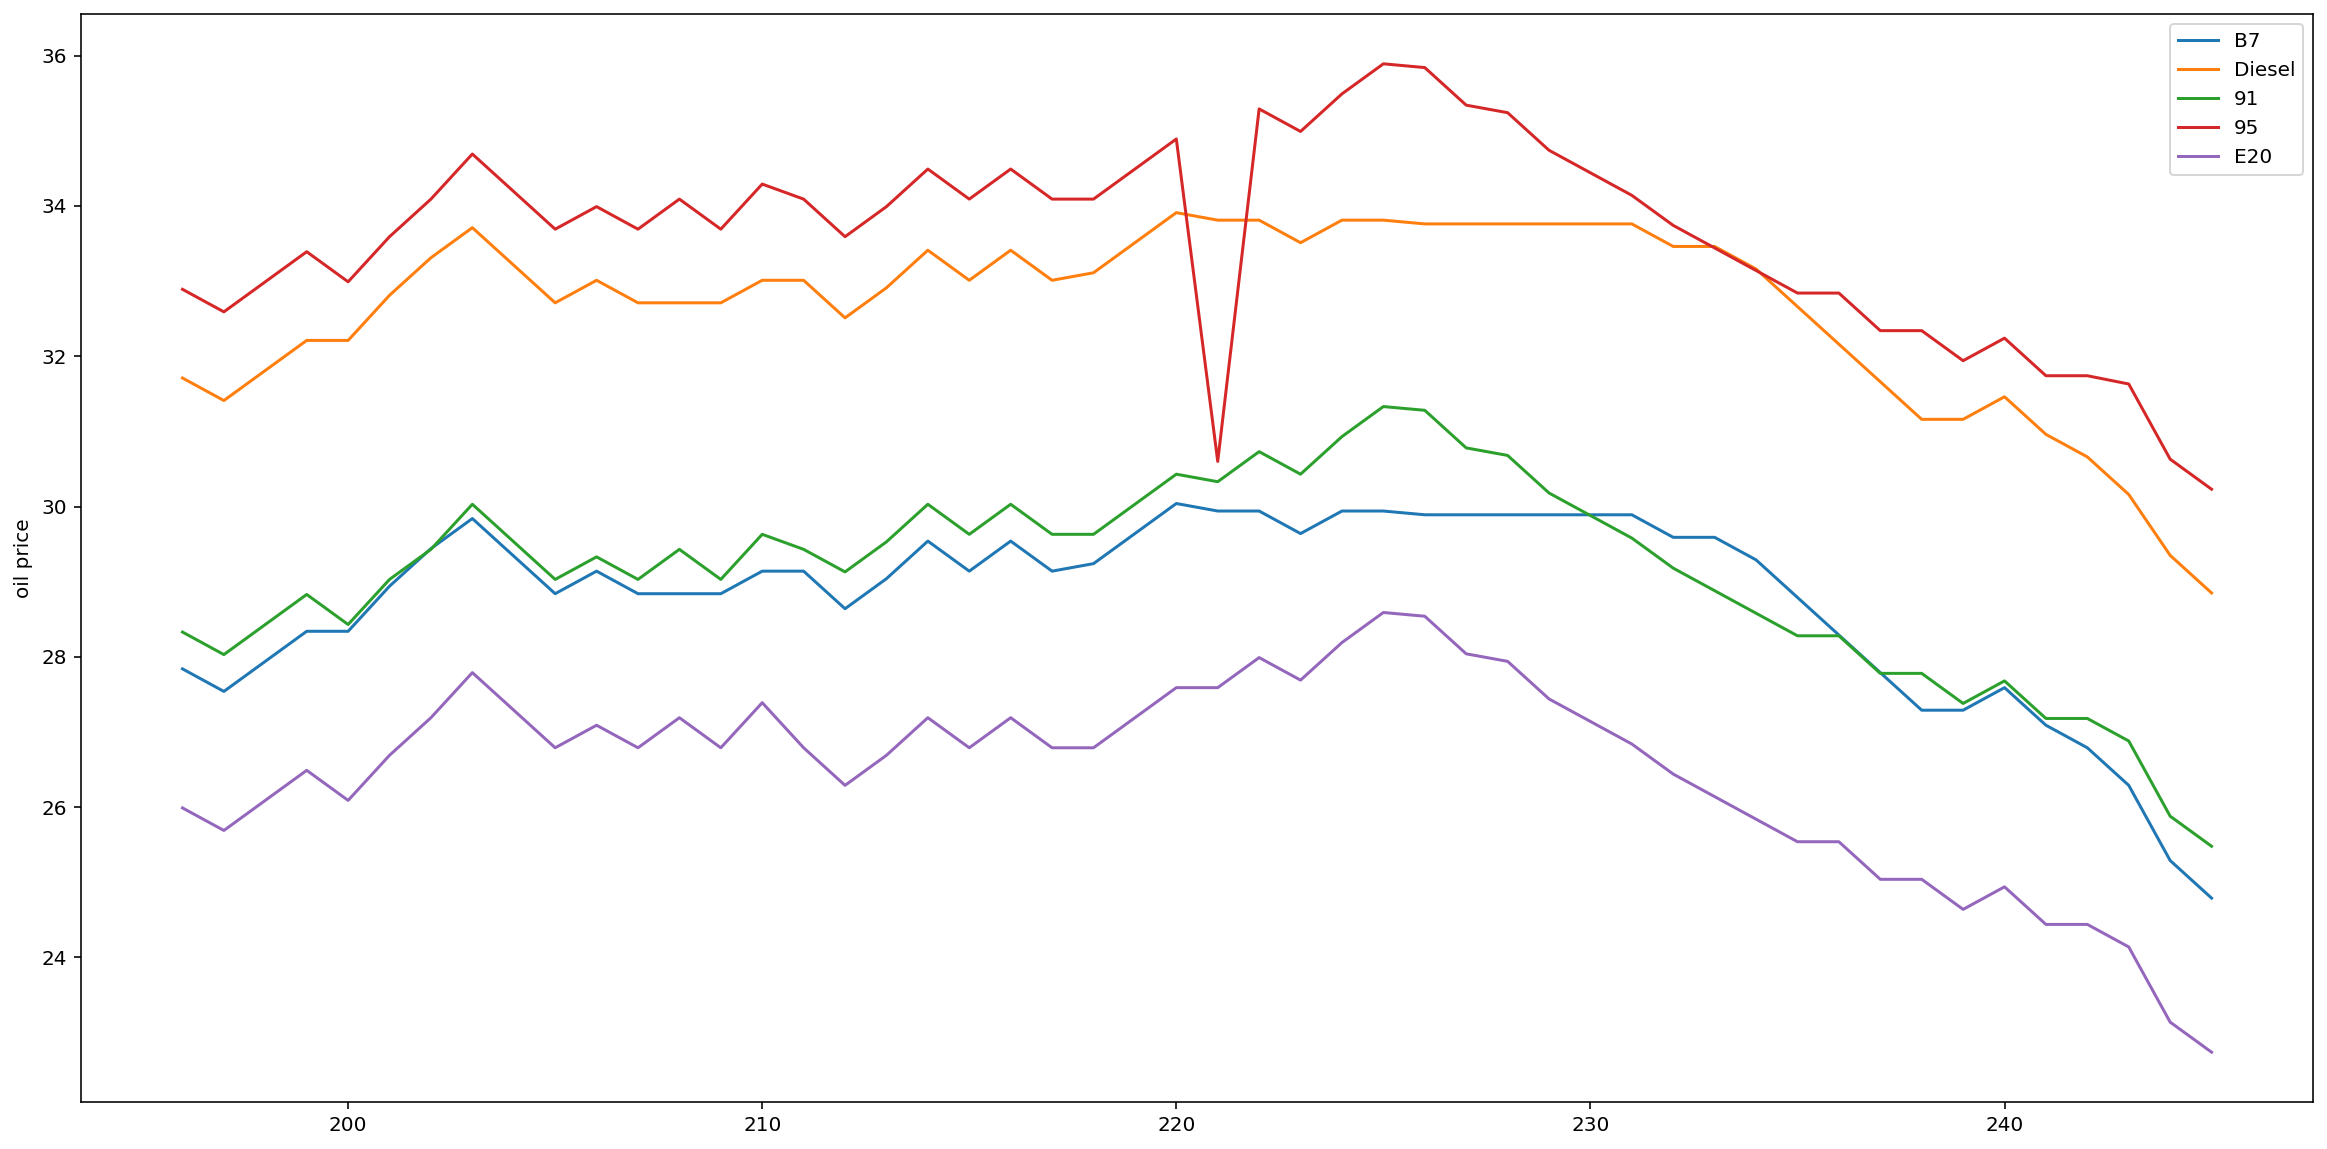

In [ ]:
predict_pricd = model.predict(X_test)
predict_pricd = pd.DataFrame(predict_pricd,index=y_test.index)
predict_pricd.plot(figsize=(20,10))
plt.legend(['B7',	'Diesel',	'91',	'95',	'E20'])
plt.ylabel("oil price")
plt.show()

In [ ]:
R_squared_score = model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("ความแม่นยำในการทำนายเท่ากับ " + accuracy)

ความแม่นยำในการทำนายเท่ากับ 100.00
